In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour, clabel,colorbar,axis,title,show, contourf
                
import scipy

In [25]:
S=scipy.linspace(5, 160, 100)
#dic=scipy.linspace(0.001526, 0.002100, 100)
#dic=scipy.linspace(0.0008, 0.0175, 100)

dic=scipy.linspace(0.0008, 0.02, 100)

TC=20.0 #Celsius
Ca=0.0115

pH=7.84

In [26]:
def Omega_pH_S(S, dic, pH):
    TK=TC+273.15 #Temperatura de Celsius a Kelvin   
    #K0
    lnK0 = 9345.17/TK - 60.2409 + 23.3585 * np.log(TK/100) + S * (0.023517 - 0.00023656 * TK + 4.7036e-07 * 
        TK * TK)
    K0=np.exp(lnK0)
    #K1 and K2 Saas and Ben Yaakov
    pK1=6.1568-0.00352*S
    pK2=8.5503-0.0080*S
    K1=10**(-pK1)
    K2=10**(-pK2)
    #Ksp_a
    tmpa1 = -171.945 - 0.077993 * TK + 2903.293/TK + 71.595 * np.log10(TK)
    tmpa2 = +(-0.068393 + 0.0017276 * TK + 88.135/TK) * np.sqrt(S)
    tmpa3 = -0.10018 * S + 0.0059415 * S**1.5
    log10Kspa = tmpa1 + tmpa2 + tmpa3
    Ksp_a=10**(log10Kspa)
    #Ksp_c
    tmpc1 = -171.9065 - 0.077993 * TK + 2839.319/TK + 71.595 * np.log10(TK)
    tmpc2 = +(-0.77712 + 0.0028426 * TK + 178.34/TK) * np.sqrt(S)
    tmpc3 = -0.07711 * S + 0.0041249 * S**1.5
    log10Kspc = tmpc1 + tmpc2 + tmpc3
    Ksp_c=10**(log10Kspc)
    
    #Ksp_c=6.7e-04
    #Carbonate system components
    h=10**(-pH)
    hco3=dic/(1+h/K1+K2/h)
    co3=dic/(1+h/K2+h*h/(K1*K2))
    co2=dic/(1+K1/h+K1*K2/(h*h))
    fco2=co2 / K0
    pH=-np.log10(h)
    Omega_cal=co3*Ca/Ksp_c
    Omega_ar=co3*Ca/Ksp_c
    alk=2*co2+hco3
    return S, dic, Omega_cal, Omega_ar, alk, co2

In [27]:
#K0=K0_Weiss(S, TC)
#K1, K2=K1_K2_Roy(S, TC)
#K1, K2=K1_K2_SBY(S)
#Ksp_c=Kspc_Mucci(S, TC)
#Ksp_a=Kspa_Mucci(S, TC)

In [28]:
v_Omega_pH_S = np.vectorize(Omega_pH_S)


In [29]:
#S1, dic1, Omega_cal1, Omega_ar1, alk1=v_Omega_pH_S(S=S, dic=0.0018, pH=pH)
#plt.scatter(S1, Omega_cal1, color='k')
#plt.axhline(y=1)
#plt.xlim(15, 175)

In [30]:

S, dic=meshgrid(S, dic)
S, dic, Omega_cal, Omega_ar, alk, co2=v_Omega_pH_S(S=S, dic=dic, pH=pH)

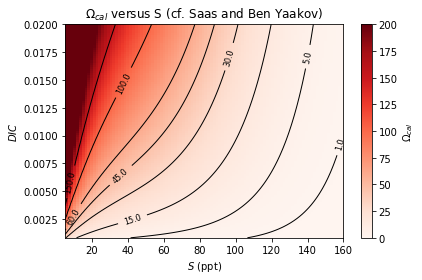

In [31]:
#plt.imshow(SLP,origin='lower')
xp=plt.imshow(Omega_cal,  cmap=cm.Reds,aspect='auto',origin='lower',extent=(S.min(),S.max(),dic.min(),dic.max()))
cbar=plt.colorbar(xp)
plt.clim(0, 200)
cbar.set_label('$\Omega_{cal}$')

levels=[0.0, 1, 5, 15, 30, 45, 60, 100, 150]
#levels=40
contours = plt.contour(S, dic, Omega_cal, levels, colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=8,  fmt='%1.1f')

#contours_alk = plt.contour(S, dic, alk, levels, colors='blue', linewidths=1)
#plt.clabel(contours_alk, inline=True, fontsize=8,  fmt='%1.1f')
#plt.clim(0, 500)
#plt.scatter(9.1, 0.0073)
plt.xlabel('$S$ (ppt)')
plt.ylabel('$DIC$')
plt.title('$\Omega_{cal}$ versus S (cf. Saas and Ben Yaakov)')
plt.tight_layout()
#plt.savefig('SBY_2_dic and co2 versus pH.pdf')

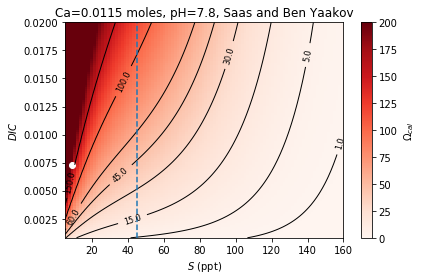

In [35]:
#plt.imshow(SLP,origin='lower')
xp=plt.imshow(Omega_cal,  cmap=cm.Reds,aspect='auto',origin='lower',extent=(S.min(),S.max(),dic.min(),dic.max()))
cbar=plt.colorbar(xp)
plt.clim(0, 200)
cbar.set_label('$\Omega_{cal}$')

levels=[0.0, 1, 5, 15, 30, 45, 60, 100, 150]
#levels=40
contours = plt.contour(S, dic, Omega_cal, levels, colors='black', linewidths=1)
plt.clabel(contours, inline=True, fontsize=8,  fmt='%1.1f')

#contours_alk = plt.contour(S, dic, alk, levels, colors='blue', linewidths=1)
#plt.clabel(contours_alk, inline=True, fontsize=8,  fmt='%1.1f')

plt.xlabel('$S$ (ppt)')
plt.ylabel('$DIC$')
plt.title('Ca=0.0115 moles, pH=7.8, Saas and Ben Yaakov')
plt.scatter(9.1, 0.0073, color='white')
plt.axvline(x=45, linestyle='--')
plt.tight_layout()
plt.savefig('SBY_2_DIC_S_omega.pdf')

In [ ]:
print(pH)